# Session 02 - Regression - Assignment
***Name: Joakim Magnussen***

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import calendar
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.feature_selection import f_regression
from sklearn.covariance import EllipticEnvelope

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

import seaborn as sns; sns.set(color_codes=True)

## 1. Wine quality

A lot of portugese Vinho Verde wines (http://www.vinhoverde.pt/en/) have been chemically analized. They have also been rated by a panel of wine experts. 

The features comprise:
1- fixed acidity | 2 - volatile acidity | 3 - citric acid | 4 - residual sugar | 5 - chlorides | 6 - free sulfur dioxide | 7 - total sulfur dioxide | 8 - density | 9 - pH | 10 - sulphates |11 - alcohol

The target variable is the quality score

Apply regression to (as accurately as possible) predict the quality score of the wine from the chemical parameters.


In [3]:
# Reading the dataset
dataset = pd.read_csv('winequality-red.csv', delimiter=';')
dataset.shape

(1599, 12)

In [4]:
# Show first rows of the dataset
dataset.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Statistical analysis

- Compute an overview of the main statistical parameters. Use the dataset.describe() function.
- Check for missing values
- Check for outliers
- Make a correlation heatmap and discuss the results
- Make a pairplot and discuss the results.


In [5]:
# Statistical description
dataset.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Check for missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Removing outliers
# Don't remove outliers, always a risk, better performance on the training set because all the extreme values are easier to predict. If the model have never seen extreme values before you cant expect it will be able to deal with the extreme values if they are coming along when we are using the model.

<AxesSubplot:>

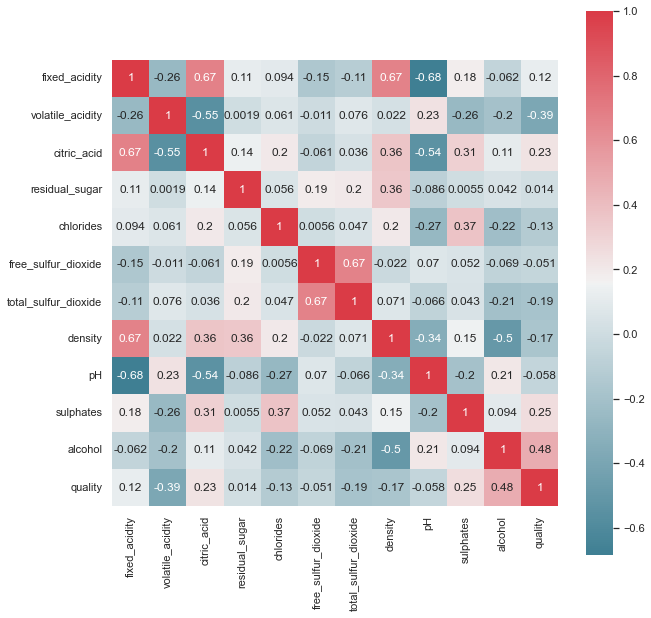

In [8]:
# Correlation heatmap
dataset.corr()
f, ax = plt.subplots(figsize=(10, 10))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

#### Reflections on the result of the heatmap:
This is a linear relationship which is expressed by correlation coefficient. By this we can get a better view off which features are more important than other features.

We can see that this correlation coefficient ranges from ***-1 to +1.*** Values closer to ***0*** can give us an indication that there is no linear trend between the two features. The closer to ***+1*** the coefficient the more positively correlated they are. If one feature increases so does the other. A correlation closer to ***-1*** is similar, but instead of both increasing, one feature will decrease as the other increases.

From the heatmap we can see that there are very little coefficient that are close to ***1***. The result is obvious, we have not trained or model, so there are very few correlation between the features.

Question:
Why cant we know which variable(feature) is influencing one or another? Are there not a linear dependency?


In [9]:
# Pairplot
#sns.pairplot(dataset);

### Splitting into training set and test set

In [10]:
# Split into features and targets.
y = dataset['quality'].values                 # Targets
X = dataset.drop(['quality'], axis=1).values  # Features


In [42]:
# Split into training set and test set. Make sure that 30 percent
# of the wines end up in the test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_test.shape)

(320, 11)


In [12]:
# Normalize the training set and test set.


Question:
I mean many other features are important to include in this rating table. How do we implement more features..? i.e add a feature that are holding "quality of the glass". How would we get this data?

### Training the regression model

In [13]:
# Training of the regression model


In [14]:
# Print and interprete the coëfficiënts and intercept of the model


### Testing and predicting
Predict the wine quality of a wine with the following chemical parameters:

fixed_acidity: 7.3 | 
volatile_acidity: 0.70 | citric_acid: 0.00 | residual_sugar: 1.9 | chlorides: 0.079 | free_sulfur_dioxide: 11.0 | total_sulfur_dioxide: 34.0 | density: 0.9978 | pH: 3.51 | sulphates: 0.58 | alcohol: 9.4

In [15]:
# Prediction of the quality


Evaluate the model on the test set in terms of MAE, MSE and the $R^2$-score.

In [16]:
# Evaluate the model in terms of MAE, MSE and R2-score on the test set


### Model optimization

Try to improve the performance of the model. In other words, try to improve the $R^2$-score of the model.
Possible options to improve the model performance are:
-  Adding higher-order features.
-  Think of new features that can be added to the dataset or computed from the existing features.
- Use Ridge regression and Lasso regression. Try to find a good value for alpha, the regularization parameter.
- Check for underfitting and overfitting.
- You can add higher-order features by means of the sklearn.preprocessing.PolynomialFeatures function. Don't go higher than a fourth-order polynomial.

In [17]:
# Model optimization and hyperparameter tuning.


## 2. Insurance

The file 'insurance.csv' contains (personal) information about clients of an insurance company. The dataset also has information about the insurance charge the clients pay.

The features are:
- age: age of the insured client (numerical variable)
- sex: sex of the insured client: male or female (categorical variable)
- bmi: the bodymass index (numerical variable)
- children: number of children the client has (numerical variable)
- smoker: whether or not the client smokes (categorical variable)
- region: region where the client lives (categorical variable)

The target is:
- charges: the insurance charge the client pays in dollar (numerical variable)

Train a regression model that can accurately predict the insurance charge new clients will pay.

### Reading the dataset

In [18]:
# Read the dataset

dataset = pd.read_csv('./insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Preprocessing and statistical analysis

- Check for unrealistic or missing values.
- Look at the distribution of the different variables (features and target)in the dataset. Plot a histogram of the different variable. Are there normaly distributed variables?
- The features sex and smoker contain categorical non-numerical values. Convert them to numbers . For example with the feature 'Sex' you can replace female by the number 1 and male by the number 0. The same goes for the feature 'smoker'. Use the pandas replace function (more info: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
- The feature 'region' multiple categories. Use one-hot encoding to convert them to numerical representation. More information on one-hot encoding scikit-learn: https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b.
- Make a correlation heatmap. Write down some conclusions: eg. Are there features that have a big influence on the charges? Which features are highly correlated with one another? If you would have to discard some features, which ones would it be?
- Make a pairplot an formulate some conclusions. 
- Normalize the features, except the one-hot encoded features. Choose between Standard scaler, MinMax scaler and Robust scaler. 


In [19]:
# replace female->1 , male -> 0

# replace smoker yes->1 , no->0


In [20]:
# statistical summary



In [21]:
# histograms: age, sex, bmi, number of children, smoker, charges



#### One-hot encoding of the feature 'region'

Use the pandas function 'get_dummies'. The one-hot encoded features will be added as extra columns at the end of the dataframe. Drop the original 'region' column.



In [22]:
# One-hot encoding of region



### Make a training set and a test set 

In [23]:
# Split into features and targets



In [24]:
# Make a traing set and test set. Make sure you have 300 samples in the test set.



### Feature scaling
Only scale non-categorical features. 

In [25]:
# Scaling 







### Train and evaluate the regression model

Train a regression model. Print the coefficients. Formulate some conclusions.


In [26]:
# Training



In [27]:
# print the coefficients, intercept + conclusions

Evaluate the trained model on the test set. Use MAE, MSE the $R^2$-score. Forumalate some conclusions.

In [28]:
# Model evaluation.



### Model optimization and feature engineering

Try to improve the performance of the regression model. This means that you try to lower the MAE and MSE while increasing the $R^2$-score

Possible options:
- Add extra features (from existing features). 
- Regularization:Ridge regression and Lasso regression.  
- Check for overfitting/underfitting
- Add PolynomialFeatures. Don't go higher than 5th order. 

Discuss the final result.

In [29]:
# Model optimization



### Making predictions

Predict the charges of the following client:
   
- age: 30
- sex: female
- bmi: 22
- children: 0
- smoker: no
- region: northwest

## 3. Electricity consumption

Every ten minutes the temperture (in degrees Celcius) and the humidity (in %) of a well insulated house was measured for a couple of months. There is also available weather data from a nearby weather station.
The power consumption of the electric lighting, together with the power consumption of other electrical appliences was recorded during that period same period. 

All measurements can be found in 'Energy_consumption.csv'

The variables have the following meaning:

- date: time year-month-day hour:minute:second
- Appliances: energy use in Wh
- lights: energy use of light fixtures in the house in Wh
- T1: Temperature in kitchen area, in Celsius
- RH_1: Humidity in kitchen area, in %
- T2: Temperature in living room area, in Celsius
- RH_2: Humidity in living room area, in %
- T3: Temperature in laundry room area
- RH_3: Humidity in laundry room area, in %
- T4: Temperature in office room, in Celsius
- RH_4: Humidity in office room, in %
- T5: Temperature in bathroom, in Celsius
- RH_5: Humidity in bathroom, in %
- T6: Temperature outside the building (north side), in Celsius
- RH_6: Humidity outside the building (north side), in %
- T7: Temperature in ironing room , in Celsius
- RH_7: Humidity in ironing room, in %
- T8: Temperature in teenager room 2, in Celsius
- RH_8: Humidity in teenager room 2, in %
- T9: Temperature in parents room, in Celsius
- RH_9: Humidity in parents room, in %
- To: Temperature outside (from Chievres weather station), in Celsius
- Pressure: (from Chievres weather station), in mm Hg 
- RH_out: Humidity outside (from Chievres weather station), in %
- Wind speed: (from Chievres weather station), in m/s
- Visibility: (from Chievres weather station), in km
- Tdewpoint: (from Chievres weather station),
- rv1: Random variable 1, nondimensional
- rv2: Random variable 2, nondimensional


The random variables rv1 and rv2 can be removed from the dataset.


The goal of this assignment is to train a regression model that can predict as precisely as possible the electricity consumption of the appliences from the other variables. 

In [30]:
dataset = pd.read_csv('Energy_consumption.csv')
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Try linear regression to predict the Appliences variable from the other variables. 

You get all the freedom to use the techniques and tricks you want. Your only goals is to achieve the best R²-score on a test set consisting of 5000 samples. It might be useful to use the date and time of the day as features.

In [31]:
# Convert and split date into month, day, hour
dataset['date'] = pd.to_datetime(dataset.date)
dataset.insert(0,'month', dataset['date'].dt.month)
dataset.insert(0,'day',  dataset['date'].dt.weekday)
dataset.insert(0,'hour', dataset['date'].dt.hour)
dataset['month'] = dataset['month'].apply(lambda x: calendar.month_name[x])
dataset['day'] = dataset['day'].apply(lambda x: calendar.day_name[x])

dataset.drop('date',axis=1,inplace=True)

dataset.head()

,hour,day,month,Appliances,lights,T1,RH_1,T2,RH_2,T3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,17,Monday,January,60,30,19.89,47.596667,19.2,44.790000,19.79,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,17,Monday,January,60,30,19.89,46.693333,19.2,44.722500,19.79,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,17,Monday,January,50,30,19.89,46.300000,19.2,44.626667,19.79,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,17,Monday,January,50,40,19.89,46.066667,19.2,44.590000,19.79,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,17,Monday,January,60,40,19.89,46.333333,19.2,44.530000,19.79,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [32]:
# Remove rv1 and rv2 from the dataset


In [33]:
# One-hot encoding of the categorical features


In [34]:
# Split into features and targets


In [35]:
# Split into training set and test set

In [36]:
# MinMax scaling


In [37]:
# Linear regression


In [38]:
# Model optimazation and hyperparameter tuning of the linear regression model. You are allowed to use features expansion (hihger order features)
# Polynomial expansion with Lasso (L1) or Ridge (L2)
